In [1]:
# import libraries
import math
import csv
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
import warnings



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [11]:
# read data
data = pd.read_csv("Integrated.csv")
data
feats = data.values[:,1:]
feats

# performing KMeans algorithm
kmean = KMeans(n_clusters=6, random_state=100).fit(feats)
cluster = kmean.labels_+1
data['cluster'] = cluster
data
#data = np.append(data, cluster, 1)

# creating clusters
cluster1 = data[data['cluster']==1]

cluster2 = data[data['cluster']==2]

cluster3 = data[data['cluster']==3]

cluster4 = data[data['cluster']==4]

cluster5 = data[data['cluster']==5]

cluster6 = data[data['cluster']==6]



In [12]:

#######################################################################################


# plot time series data; remove the proteins names, tranpose to make x=day, y=value
cluster1 = cluster1.drop(columns=['day', 'cluster'])
c1 = cluster1.T
c1

cluster2 = cluster2.drop(columns=['day', 'cluster'])
c2 = cluster2.T
c2

cluster3 = cluster3.drop(columns=['day', 'cluster'])
c3 = cluster3.T
c3

cluster4 = cluster4.drop(columns=['day', 'cluster'])
c4 = cluster4.T
c4

cluster5 = cluster5.drop(columns=['day', 'cluster'])
c5 = cluster5.T
c5

cluster6 = cluster6.drop(columns=['day', 'cluster'])
c6 = cluster6.T
c6

# for ci, i = 1:6,
# row = days, col = the protein 

,0,4,9,17,19,20,21,29,36,38,...,3701,3702,3704,3708,3839,3843,3900,3906,3923,3991
0,0.577593,0.474713,-0.166046,-0.572090,0.197906,0.441634,0.610813,0.496960,-0.069513,-0.243119,...,-0.109498,0.134880,0.105752,-0.438474,0.285406,-0.501134,-0.023737,-0.009853,-0.645066,-0.535356
1,0.325867,0.354104,0.205629,0.005760,0.098517,0.548213,0.433666,0.439625,0.207433,-0.071517,...,-0.151978,0.459725,0.040034,0.219285,0.375066,0.191167,0.166110,0.286738,0.167701,-0.109276
3,-0.077453,0.117999,0.671377,0.870878,0.097570,0.596096,0.108881,0.354114,0.605496,0.250616,...,0.006319,0.640941,-0.058646,1.000000,0.310485,0.967435,0.377398,0.671818,1.000000,0.942810
5,-0.107155,-0.008218,0.606228,1.000000,0.287499,0.302510,-0.075170,0.219885,0.571025,0.537115,...,0.390734,0.243282,0.204849,0.541060,0.257075,0.680580,0.333411,0.616218,0.539016,1.000000
7,0.077824,0.003251,0.212620,0.190707,0.340643,-0.179412,-0.089992,-0.105324,0.176683,0.576772,...,0.602357,-0.065945,0.471384,-0.443523,0.081408,-0.374065,0.250286,0.055670,-0.319684,0.023247
10,0.203323,0.058151,-0.529809,-0.867567,-0.022135,-0.709042,0.011803,-0.405260,-0.491124,-0.049868,...,0.262066,-0.412883,0.236626,-0.937307,-0.309440,-1.000000,-0.103468,-0.620591,-0.754006,-0.858417
14,-1.000000,-1.000000,-1.000000,-0.627687,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,0.058958,-1.000000,0.036017,-1.000000,-1.000000,0.012039,-0.463008


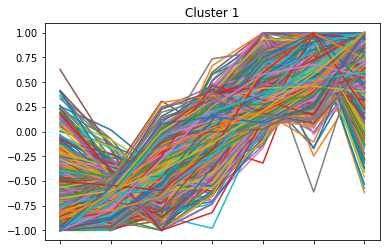

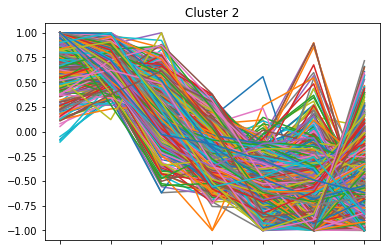

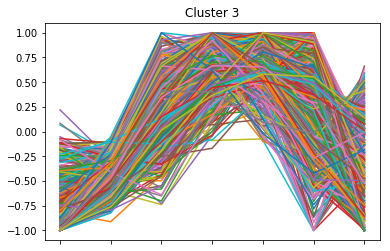

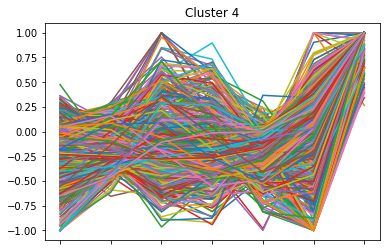

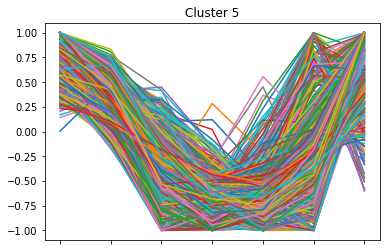

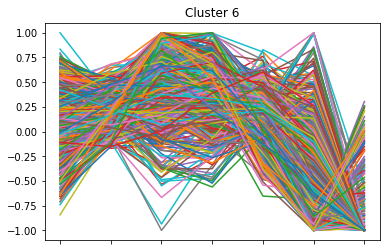

In [27]:
# plotting and saving the trends within each cluster

c1.plot(kind='line', legend=False)
plt.title('Cluster 1')
plt.savefig('cluster1.png')

c2.plot(kind='line', legend=False)
plt.title('Cluster 2')
plt.savefig('cluster2.png')

c3.plot(kind='line', legend=False)
plt.title('Cluster 3')
plt.savefig('cluster3.png')

c4.plot(kind='line', legend=False)
plt.title('Cluster 4')
plt.savefig('cluster4.png')

c5.plot(kind='line', legend=False)
plt.title('Cluster 5')
plt.savefig('cluster5.png')

c6.plot(kind='line', legend=False)
plt.title('Cluster 6')
plt.savefig('cluster6.png')

In [ ]:
- validating results:
    - validating k-means:
        - elbow method
        - silhouette analysis
    - only able to confirm that clusters are meaningful via biological database lookup???
- pattern clustering:
    - so far no python packages, only papers with mathematical equations
- gmm:
    - does this count as distribution??
    - can alg recognize not non-distinct clusters??
- hierarchal clustering
    - package in r
    - how would results turn out?? would they be too specific or??
    
    
- validating k means:
    - plot center for each day (i.e. average value for days 0 1 3 5 7 10 14)
    - calculate loss by measuring L2 distance between values and centroid for each day
    - sum the loss for days, then loss for proteins and divide by total proteins to get average
    - each day & cluster has a loss

In [59]:
# plot center for each day (i.e. average value for days 0 1 3 5 7 10 14)
# how to do: take average value in each column
# plt.figure(1) 
# avg_c1 = np.mean(cluster1,axis=0)
# avg_c1
# avg_c1.plot(kind='line', legend=False)
# plt.title('Average Values of Cluster 1')
# plt.savefig('avg_cluster1.png')

# plt.figure(2) 
# avg_c2 = np.mean(cluster2,axis=0)
# avg_c2
# avg_c2.plot(kind='line', legend=False)
# plt.title('Average Values of Cluster 2')
# plt.savefig('avg_cluster2.png')

# plt.figure(3) 
# avg_c3 = np.mean(cluster3,axis=0)
# avg_c3
# avg_c3.plot(kind='line', legend=False)
# plt.title('Average Values of Cluster 3')
# plt.savefig('avg_cluster3.png')

# plt.figure(4) 
# avg_c4 = np.mean(cluster4,axis=0)
# avg_c4
# avg_c4.plot(kind='line', legend=False)
# plt.title('Average Values of Cluster 4')
# plt.savefig('avg_cluster4.png')

# plt.figure(5) 
# avg_c5 = np.mean(cluster5,axis=0)
# avg_c5
# avg_c5.plot(kind='line', legend=False)
# plt.title('Average Values of Cluster 5')
# plt.savefig('avg_cluster5.png')

# plt.figure(6) 
# avg_c6 = np.mean(cluster6,axis=0)
# avg_c6
# avg_c6.plot(kind='line', legend=False)
# plt.title('Average Values of Cluster 6')
# plt.savefig('avg_cluster6.png')

In [97]:
#     - calculate loss by measuring L2 distance between values and centroid for each day
#     - sum the loss for days, then loss for proteins and divide by total proteins to get average
#     - each day & cluster has a loss

# HOW TO DO:
#   - save sum of loss for each day into a vector, then take average for each day

# array that saves the loss for each cluster
loss_by_cluster = []
days = list(range(0,7))

#cluster 1
loss_c1 = []
for i in days:
    for j in range(0,len(cluster1)):
        loss_by_day = sum((cluster1.iloc[:, i].values - avg_c1[i])**2) # loss per day, L2 norm
    loss_c1.append(loss_by_day ** (1/2)) # sqrt to complete L2 norm calculation
loss_c1.append(sum(loss_c1[0:7])/len(cluster1)) # get total loss for all days per protein each cluster
loss_c1


#cluster 2
loss_c2 = []
for i in days:
    for j in range(0,len(cluster2)):
        loss_by_day = sum((cluster2.iloc[:, i].values - avg_c2[i])**2) # loss per day, L2 norm
    loss_c2.append(loss_by_day ** (1/2)) # sqrt to complete L2 norm calculation
loss_c2.append(sum(loss_c2[0:7])/len(cluster2)) # get total loss for all days per protein each cluster
loss_c2

#cluster 3
loss_c3 = []
for i in days:
    for j in range(0,len(cluster3)):
        loss_by_day = sum((cluster3.iloc[:, i].values - avg_c3[i])**2) # loss per day, L2 norm
    loss_c3.append(loss_by_day ** (1/2)) # sqrt to complete L2 norm calculation
loss_c3.append(sum(loss_c3[0:7])/len(cluster3)) # get total loss for all days per protein each cluster
loss_c3

#cluster 4
loss_c4 = []
for i in days:
    for j in range(0,len(cluster4)):
        loss_by_day = sum((cluster4.iloc[:, i].values - avg_c4[i])**2) # loss per day, L2 norm
    loss_c4.append(loss_by_day ** (1/2)) # sqrt to complete L2 norm calculation
loss_c4.append(sum(loss_c4[0:7])/len(cluster4)) # get total loss for all days per protein each cluster
loss_c4

#cluster 5
loss_c5 = []
for i in days:
    for j in range(0,len(cluster5)):
        loss_by_day = sum((cluster5.iloc[:, i].values - avg_c5[i])**2) # loss per day, L2 norm
    loss_c5.append(loss_by_day ** (1/2)) # sqrt to complete L2 norm calculation
loss_c5.append(sum(loss_c5[0:7])/len(cluster5)) # get total loss for all days per protein each cluster
loss_c5

#cluster 6
loss_c6 = []
for i in days:
    for j in range(0,len(cluster6)):
        loss_by_day = sum((cluster6.iloc[:, i].values - avg_c6[i])**2) # loss per day, L2 norm
    loss_c6.append(loss_by_day ** (1/2)) # sqrt to complete L2 norm calculation
loss_c6.append(sum(loss_c6[0:7])/len(cluster6)) # get total loss for all days per protein each cluster
loss_c6

[8.511134523583953,
 5.00941581179116,
 8.649429806819171,
 7.393210172643706,
 6.407601227599134,
 11.831290294393341,
 6.377810977828096,
 0.07391526986992983]

In [145]:
columns = ['day_0','day_1','day_3','day_5','day_7','day_10','day_14', 'total loss for all days per protein']
cluster_name = ['cluster_1','cluster_2','cluster_3','cluster_4','cluster_5','cluster_6']
data = np.array([loss_c1, loss_c2, loss_c3, loss_c4, loss_c5, loss_c6])
kmeans_loss = pd.DataFrame(data, columns=columns)
kmeans_loss['cluster_name']=cluster_name
cols = kmeans_loss.columns.tolist()
cols = cols[-1:] + cols[:-1]
kmeans_loss = kmeans_loss[cols]
kmeans_loss

,cluster_name,day_0,day_1,day_3,day_5,day_7,day_10,day_14,total loss for all days per protein
0,cluster_1,8.766257,4.550369,6.881172,7.235204,6.630441,7.707524,9.238366,0.075907
1,cluster_2,6.224608,3.817525,7.718651,6.827696,6.503624,10.043685,11.461226,0.073976
2,cluster_3,6.097146,4.235521,7.792394,5.715499,5.850044,11.137355,10.660282,0.101156
3,cluster_4,8.338772,5.015840,9.191152,8.024222,5.678744,11.434738,2.514471,0.062203
4,cluster_5,5.911230,5.117872,7.415575,5.070233,6.283094,11.907969,8.988982,0.090527
5,cluster_6,8.511135,5.009416,8.649430,7.393210,6.407601,11.831290,6.377811,0.073915


In [147]:
cluster1

,0,1,3,5,7,10,14
3,-0.472547,-0.553316,-0.397801,-0.040966,0.200227,0.264404,1.000000
10,0.102581,-0.357200,-0.877286,-0.561000,0.009152,1.000000,0.683754
25,-0.938861,-1.000000,-0.807570,0.049598,0.885748,0.926589,0.884495
27,-1.000000,-0.717661,-0.127364,0.396842,0.587702,0.350216,0.510265
32,-0.523302,-0.556386,-0.507144,-0.421413,0.083821,0.924424,1.000000
34,-0.672633,-0.826073,-0.760100,-0.120016,0.810091,1.000000,0.568730
52,-0.227354,-0.318689,-0.595527,-0.693439,-0.164397,0.999406,1.000000
58,-0.607818,-0.668353,-0.585620,-0.117096,0.318448,0.660439,1.000000
72,-0.096099,-0.279682,-0.572964,-0.547277,0.114284,1.000000,0.381737
75,0.256823,-0.183464,-1.000000,-0.336808,0.871508,0.669704,-0.277762
